# Projet de Machine Learning

Observations et exploration des données :
- Les données contiennent des valeurs NaN.
- Des valeurs sont manquantes (ex: l'id 1 n'existe pas) --> Ces valeurs se trouvent dans DataNew_X.csv !
- Les fichiers Data_X.csv et DataNew_X.csv contiennent bien les mêmes arguments (colonnes).

## Importation des librairies

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import *
from sklearn.model_selection import KFold, train_test_split

X = pd.read_csv('Data/Data_X.csv')  # Données
y = pd.read_csv('Data/Data_Y.csv')  # Classes

# Regrouper X et Y
data = pd.concat([X, y], axis=1)
print(data)

# print(X.info())
# print(X.describe())


# Nettoyer les données
## Supprimer les données nulles
## Supprimer les données aberrantes

# kf = KFold(n_splits=5)  # On split en 5 groupes (pour l'instant)
# for train, test in kf.split(X):
#     pass
#
# df = pd.DataFrame(X)
# print(df)

        ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE   
0     1054     206      FR        0.210099       -0.427458       -0.606523  \
1     2049     501      FR       -0.022399       -1.003452       -0.022063   
2     1924     687      FR        1.395035        1.978665        1.021305   
3      297     720      DE       -0.983324       -0.849198       -0.839586   
4     1101     818      FR        0.143807       -0.617038       -0.924990   
...    ...     ...     ...             ...             ...             ...   
1489   459     809      DE        1.529204        1.106682       -1.855327   
1490  1674     887      FR        1.618582        1.752840        0.611392   
1491   748    1083      DE        0.856399        0.489199       -0.255778   
1492  1454    1133      FR        0.560689       -0.343777       -0.830239   
1493   359    1118      DE        0.226730       -0.711005        0.873016   

      FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPO

# Choix du modèle

-> On dispose de valeurs continues.
-> On ne souhaite pas donner une classe prédéfinie, mais prédire une valeur continue.
On va prendre un *algorithme de régression*.

Le sujet nous impose de modéliser les modèles suivants :
1. Régression linéaire simple
2. Régression linéaire régularisée (régression RIDGE + régression LASSO)
3. Méthode des k plus proches voisins pour la régression (K-NN regressor)
4. Arbres de décision pour la régression
5. (Bonus) Forêts aléatoires


# Nettoyage des données

Premièrement, il faut explorer les données avec data.info(), data.describe() et data.isnull().
On remarque que certaines cellules ont pour valeur NaN. On peut choisir :
- de supprimer les lignes qui contiennent des valeurs nulles, avec X.dropna() par exemple,
- de remplir les cellules nulles, avec X.fillna(nouvelle_valeur).

On peut aussi choisir de modifier des valeurs aberrantes avec X.replace(valeur, nouvelle) ou de les supprimer (on remplace par np.nan puis on supprime comme au-dessus).

In [59]:
# On observe les différentes colonnes :
data.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       'ID', 'TARGET'],
      dtype='object')

In [60]:
# Combien y a-t-il de valeurs nulles par colonne ?
data.isnull().sum()

ID                    0
DAY_ID                0
COUNTRY               0
DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              94
FR_RAIN              94
DE_WIND              94
FR_WIND              94
DE_TEMP              94
FR_TEMP              94
GAS_RET               0
COAL_RET              0
CARBON_RET            0
ID                    0
TARGET                0
dtype: int64

In [61]:
# On supprime les lignes qui contiennent des valeurs null :
data = data.dropna()
data.isnull().sum()

ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
ID                  0
TARGET              0
dtype: int64

In [62]:
# Etude des valeurs min, max, moyennes, etc. de chaque colonne :
data.describe()

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,ID,TARGET
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,...,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,1077.272727,588.365987,0.358323,-0.114128,-0.139238,0.139238,-0.268127,-0.103871,0.268127,0.103871,...,0.003353,0.186522,0.198205,0.009948,0.010945,0.063241,0.029728,0.066230,1077.272727,0.093677
std,647.608506,342.278568,0.667052,0.862587,0.978287,0.978287,0.966510,1.100724,0.966510,1.100724,...,1.056972,1.071384,1.069974,0.943305,0.998779,1.115762,1.026389,1.119411,647.608506,1.071405
min,0.000000,1.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,...,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.392852,-4.281790,0.000000,-6.519268
25%,530.500000,292.000000,-0.076672,-0.740151,-0.963290,-0.654735,-1.008176,-0.895526,-0.452252,-0.819463,...,-0.522646,-0.616389,-0.627847,-0.612091,-0.668435,-0.651410,-0.468260,-0.545607,530.500000,-0.245709
50%,1159.500000,586.000000,0.281250,-0.470896,-0.105837,0.105837,-0.335690,0.065382,0.335690,-0.065382,...,-0.238458,-0.176477,-0.132396,-0.034815,-0.032882,0.000000,0.035338,0.028797,1159.500000,-0.005201
75%,1610.250000,884.250000,0.862662,0.436629,0.654735,0.963290,0.452252,0.819463,1.008176,0.895526,...,0.148034,0.764577,0.984079,0.630895,0.702167,0.697493,0.620505,0.588373,1610.250000,0.285540
max,2146.000000,1212.000000,2.033851,2.455052,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,...,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.607281,5.471818,2146.000000,7.786578


In [63]:
# Vérification de l'existence de lignes dupliquées :
data.duplicated().any()

# data.duplicated().any() retourne False donc pas besoin de supprimer les lignes en double puisqu'il n'y en a pas.

False

In [64]:
# On resépare les données en X et y :
X = data.iloc[:, :-2]
y = data.iloc[:, -2:]

# Analyse univariée des données
On trace les histogrammes des variables pour obtenir leur évolution.

In [65]:
import matplotlib

matplotlib.rcParams.update({'font.size': 2})
matplotlib.rcParams.update({'grid.linewidth': 0.5})
matplotlib.rcParams.update({'axes.linewidth': 0.5})
data.hist()
# plt.show()
plt.tight_layout()
plt.savefig('histogrammes.png', dpi=500)

plt.close()
plt.clf()

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
for column in data.columns:
    if column != 'COUNTRY':
        plt.boxplot(data[column])
        plt.title("Diagramme de boîte pour la colonne '" + column + "'")
        # plt.show()
        plt.savefig('boxdiag/box_' + column + '.png', dpi=500)
        plt.close()
        plt.clf()
# data.boxplot()
# plt.tight_layout()
# plt.savefig('filename.png', dpi=500)

# Analyse bivariée des données
En utilisant X.describe(), on remarque que la colonne ID ne devrait pas être prise en compte lors de l'analyse puisqu'elle n'a aucune dimension réelle. De la même manière, il ne faudra pas prendre en compte la colonne DAY_ID.

<Figure size 640x480 with 0 Axes>

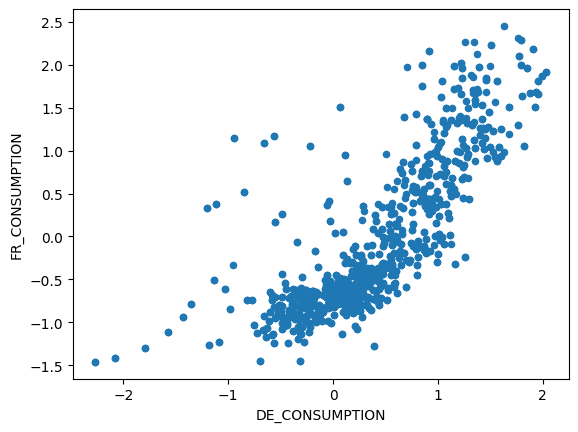

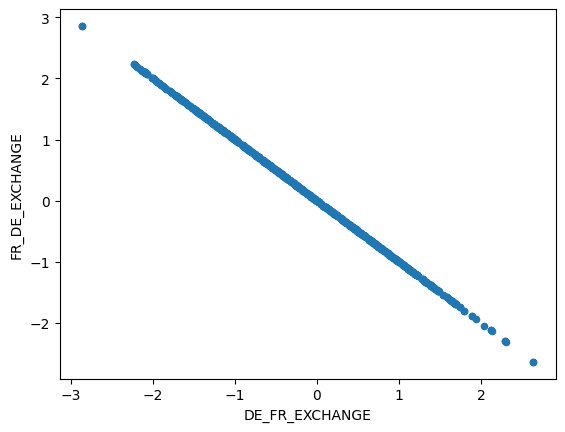

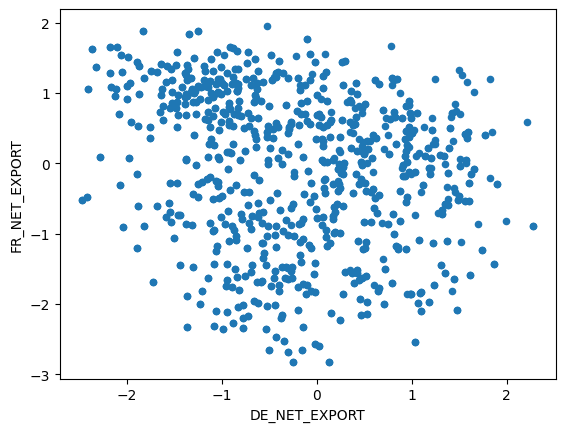

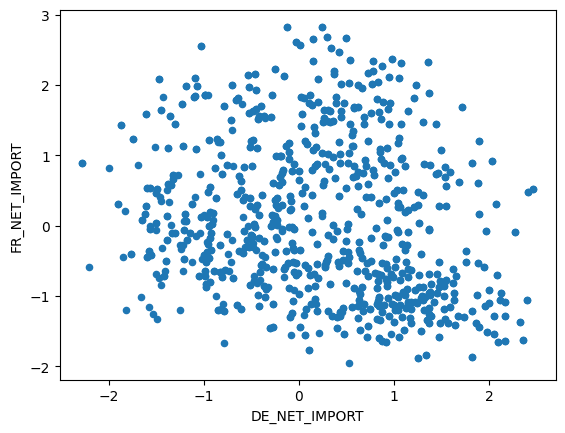

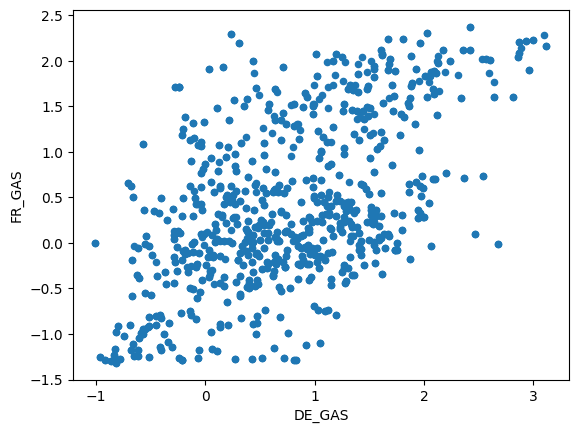

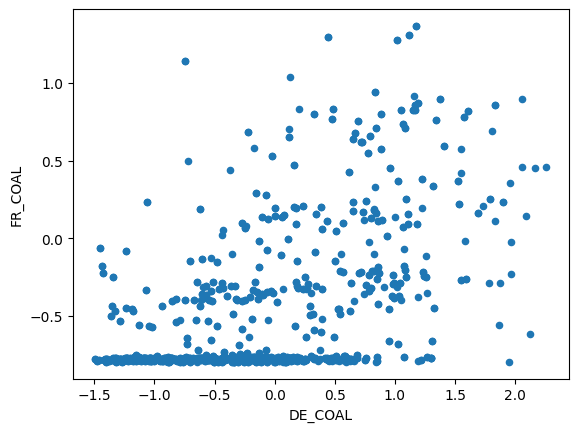

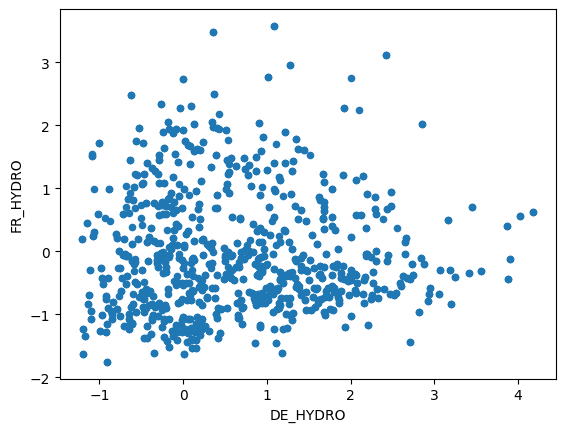

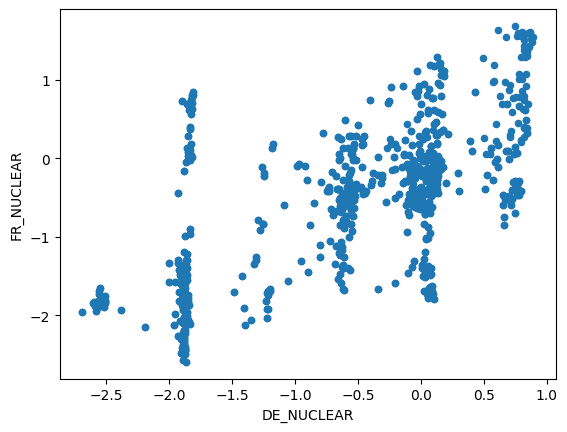

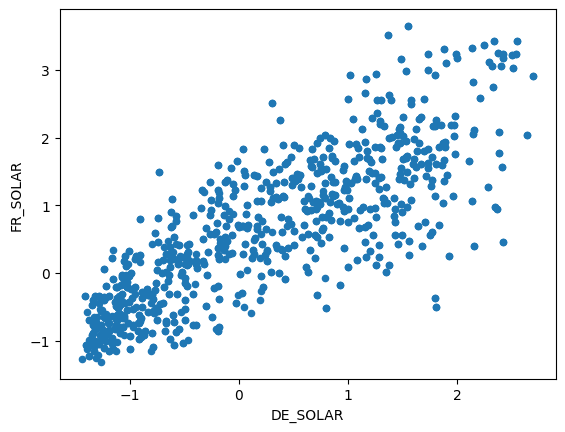

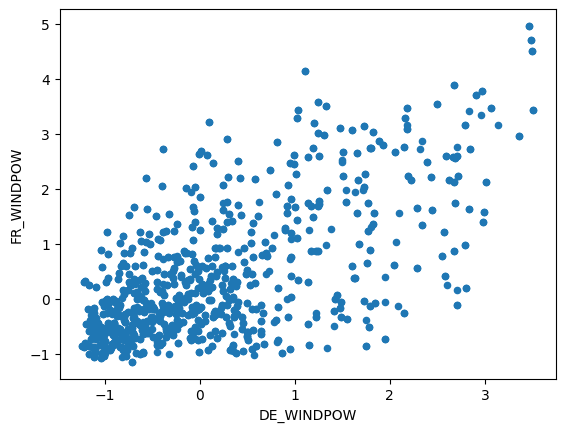

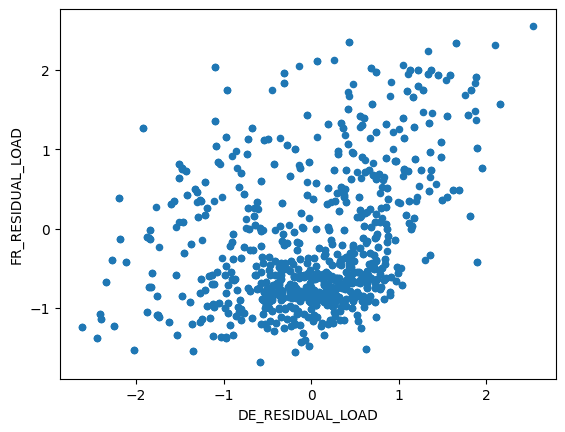

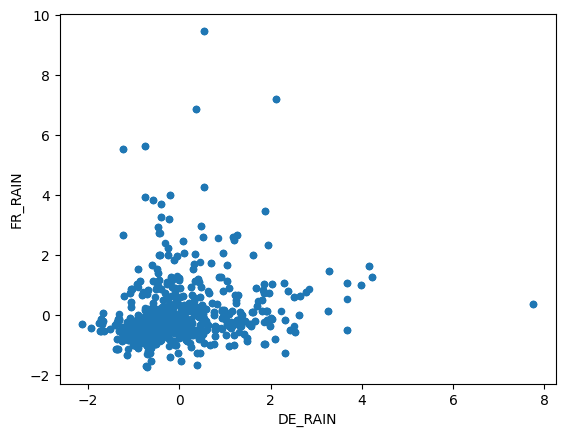

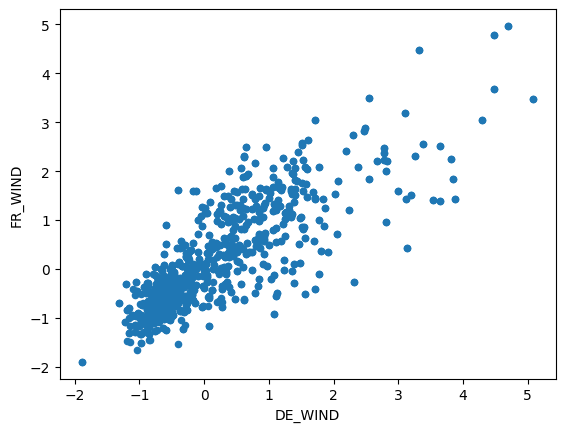

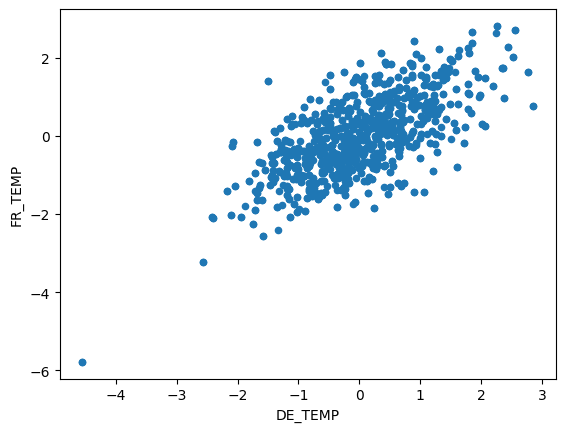

In [66]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault) # Réinitialisation des paramètres de mise en page de matplotlib.

X.plot.scatter("DE_CONSUMPTION", "FR_CONSUMPTION")
X.plot.scatter("DE_FR_EXCHANGE", "FR_DE_EXCHANGE")
X.plot.scatter("DE_NET_EXPORT", "FR_NET_EXPORT")
X.plot.scatter("DE_NET_IMPORT", "FR_NET_IMPORT")
X.plot.scatter("DE_GAS", "FR_GAS")
X.plot.scatter("DE_COAL", "FR_COAL")
X.plot.scatter("DE_HYDRO", "FR_HYDRO")
X.plot.scatter("DE_NUCLEAR", "FR_NUCLEAR")
X.plot.scatter("DE_SOLAR", "FR_SOLAR")
X.plot.scatter("DE_WINDPOW", "FR_WINDPOW")
X.plot.scatter("DE_RESIDUAL_LOAD", "FR_RESIDUAL_LOAD")
X.plot.scatter("DE_RAIN", "FR_RAIN")
X.plot.scatter("DE_WIND", "FR_WIND")
X.plot.scatter("DE_TEMP", "FR_TEMP")
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler

# On split les données par pays.
# On aura un jeu pour la France, et un autre pour l'Allemagne

# Pour identifier le pays, on remplace la colonne COUNTRY ['FR', 'DE'] par les colonnes COUNTRY_FR et COUNTRY_DE ['0', '1'].
data_per_country = pd.get_dummies(data, columns=['COUNTRY'], prefix='COUNTRY')

# Séparation en deux jeux
data_fr = data_per_country[data_per_country['COUNTRY_FR']]
data_de = data_per_country[data_per_country['COUNTRY_DE']]

# Séparation des X et des y.
target_fr = data_fr['TARGET']
target_de = data_de['TARGET']

# On ne garde que les colonnes correspondantes au pays (on affine dans une partie plus tard) :
data_fr = data_fr[
    ['FR_CONSUMPTION', 'FR_DE_EXCHANGE', 'FR_NET_EXPORT', 'FR_NET_IMPORT', 'FR_GAS', 'FR_COAL', 'FR_HYDRO',
     'FR_NUCLEAR', 'FR_SOLAR', 'FR_WINDPOW', 'FR_RESIDUAL_LOAD', 'FR_RAIN', 'FR_WIND', 'FR_TEMP', 'GAS_RET', 'COAL_RET',
     'CARBON_RET']]
data_de = data_de[
    ['DE_CONSUMPTION', 'DE_FR_EXCHANGE', 'DE_NET_EXPORT', 'DE_NET_IMPORT', 'DE_GAS', 'DE_COAL', 'DE_HYDRO',
     'DE_NUCLEAR', 'DE_SOLAR', 'DE_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'DE_RAIN', 'DE_WIND', 'DE_TEMP',
     'GAS_RET', 'COAL_RET', 'CARBON_RET']]

# On normalise
scaler = StandardScaler()
names = data_fr.columns
scaled_data = scaler.fit_transform(data_fr)
data_fr = pd.DataFrame(scaled_data, columns=names)

names = data_de.columns
scaled_data = scaler.fit_transform(data_de)
data_de = pd.DataFrame(scaled_data, columns=names)


In [68]:
matplotlib.rcParams.update({'font.size': 2})
matplotlib.rcParams.update({'grid.linewidth': 0.5})
matplotlib.rcParams.update({'axes.linewidth': 0.5})

# On étudie les coefficients de corrélation
plt.close()
plt.clf()

# Corrélation FR
fr = pd.concat([data_fr, target_fr], axis=1)
sn.heatmap(fr.corr(), annot=True, cmap='RdBu')
plt.savefig('heatmap_fr.png', dpi=500)
plt.close()
plt.clf()

# Corrélation FR >= 0,6
fr = pd.concat([data_fr, target_fr], axis=1)
sn.heatmap(fr.corr()[fr.corr().abs() >= 0.6], annot=True, cmap='RdBu')
plt.savefig('heatmap_fr_0,6.png', dpi=500)
plt.close()
plt.clf()

# Corrélation DE
de = pd.concat([data_de, target_de], axis=1)
sn.heatmap(de.corr(), annot=True, cmap='RdBu')
plt.savefig('heatmap_de.png', dpi=500)
plt.close()
plt.clf()

# Corrélation DE >= 0,6
de = pd.concat([data_de, target_de], axis=1)
sn.heatmap(de.corr()[de.corr().abs() >= 0.6], annot=True, cmap='RdBu')
plt.savefig('heatmap_de_0,6.png', dpi=500)
plt.close()
plt.clf()

matplotlib.rcParams.update(matplotlib.rcParamsDefault) # Réinitialisation des paramètres de mise en page de matplotlib.

## Régression linéaire simple

In [69]:
# On sépare les données en un jeu d'entraînement et un jeu de test :
data_fr_train, data_fr_test, target_fr_train, target_fr_test = train_test_split(data_fr, target_fr, random_state=10, test_size=0.2)
data_de_train, data_de_test, target_de_train, target_de_test = train_test_split(data_de, target_de, random_state=10, test_size=0.2)

# Instanciation du modèle de régression linéaire simple avec SciKit-Learn
reg_lin_simple = linear_model.LinearRegression()

# Entraînement sur les données de la France
reg_lin_simple.fit(data_fr_train, target_fr_train)

LinearRegression()

# Evaluation des modèles
Avant de passer à la régression linéaire RIDGE et aux autres modèles, nous allons chercher à vérifier leurs performances puis à les comparer.
Pour ce faire, nous disposons d'outils comme la **corrélation de Spearman**, le **coefficient de détermination R2**, et l'**erreur quadratique moyenne** (ou RMSE en anglais).

Nous allons donc utiliser les fonctions correspondantes de SciKit-Learn pour évaluer nos modèles.

In [70]:
from scipy.stats import spearmanr
from sklearn.metrics import r2_score, mean_squared_error

print("Régression linéaire simple :")
#### POUR LA FRANCE
print("- France :")
# On a déjà entraîné le modèle, donc pas besoin de fit().
# On prédit les valeurs y pour le jeu de test :
predict_fr = reg_lin_simple.predict(data_fr_test)

## Spearman
spearman, _ = spearmanr(target_fr_test, predict_fr)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_fr_test, predict_fr)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_fr_test, predict_fr, squared=False)
print("    RMSE :", rmse)

#### POUR L'ALLEMAGNE
print("- Allemagne :")
# Il faut entraîner le modèle sur les données de l'Allemagne :
reg_lin_simple.fit(data_de_train, target_de_train)
# On prédit les valeurs de y pour le jeu de test :
predict_de = reg_lin_simple.predict(data_de_test)

## Spearman
spearman, _ = spearmanr(target_de_test, predict_de)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_de_test, predict_de)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_de_test, predict_de, squared=False)
print("    RMSE :", rmse)

Régression linéaire simple :
- France :
    Spearman : 0.07525881398788224
    R2 : 0.018719823167615446
    RMSE : 1.0645536636453008
- Allemagne :
    Spearman : 0.3582123758594346
    R2 : 0.07454547719594895
    RMSE : 0.9808252480205008


## Interprétation
La valeur retournée par Spearman est comprise entre -1 et 1. Si l'on compare notre jeu de test avec celui que nous avons prédit et que nous trouvons un résultat proche de 1, cela signifie que les deux jeux sont très proches, et que notre prédiction était plutôt exacte.
Cependant, on remarque que l'on obtient ~0.0956 pour la France et ~0.935 pour l'Allemagne. Nos prédictions ne sont donc pas corrélées avec le target de test attendu (pas du tout pour la France, et peu pour l'Allemagne).

Le coefficient r-carré ou R² est un pourcentage, qui est donc compris entre 0 et 1. Plus R² se rapproche de 1, plus nos prédictions sont correctes. Pour la France et l'Allemagne, nos R² sont tous inférieurs à 0.1. Nos prédictions sont ainsi peu précises.

Ici, les valeurs RMSE obtenues sont plutôt élevées lorsqu'on les compare à nos donneés initiales.

Tout ceci signifie que notre modèle ne prédit pas de valeurs précises.

# TODO: Revoir cette page : https://medium.com/wwblog/evaluating-regression-models-using-rmse-and-r²-42f77400efee
Retravailler R-carré et RMSE.
RMSE doit être faible mais on ne sait pas à quoi ça correspond (il n'a pas de limite).
Il est sûrement compris entre 0 et une valeur max proche de la valeur max de notre jeu -> Vérifier les valeurs du jeu et regarder les exemples sur la page medium

## Améliorer les résultats
Pour améliorer nos résultats, nous pouvons utiliser les diagrammes heatmap que nous avons généré plus tôt.
Ceux-ci nous indiquent les variables qui sont corrélées entre elles.

On peut par exemple arbitrairement choisir de ne garder que les variables qui ont un facteur de corrélation avec d'autres variables supérieur ou égal à 0,6.
Pour la France, cela signifie que l'on ne garde que les variables FR_CONSUMPTION, FR_DE_EXCHANGE, FR_NET_EXPORT, FR_NET_IMPORT, FR_GAS, FR_NUCLEAR, FR_SOLAR et FR_RESIDUAL_LOAD. Pour l'Allemagne, ce sont les variables DE_CONSUMPTION, DE_FR_EXCHANGE, DE_NET_EXPORT, DE_NET_IMPORT, DE_GAS, DE_COAL, DE_SOLAR, DE_WINDPOW, DE_LIGNITE et DE_RESIDUAL_LOAD.

On peut maintenant recommencer à sélectionner nos variables, les normaliser et entraîner notre modèle :

In [71]:
# On ne garde que les variables significatives :
data_fr = data_fr[
    ['FR_CONSUMPTION', 'FR_DE_EXCHANGE', 'FR_NET_EXPORT', 'FR_NET_IMPORT', 'FR_GAS',
     'FR_NUCLEAR', 'FR_SOLAR', 'FR_RESIDUAL_LOAD']]
data_de = data_de[
    ['DE_CONSUMPTION', 'DE_FR_EXCHANGE', 'DE_NET_EXPORT', 'DE_NET_IMPORT', 'DE_GAS', 'DE_COAL',
     'DE_SOLAR', 'DE_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD']]

# # On normalise à nouveau
# scaler = StandardScaler()
# names = data_fr.columns
# scaled_data = scaler.fit_transform(data_fr)
# data_fr = pd.DataFrame(scaled_data, columns=names)
#
# names = data_de.columns
# scaled_data = scaler.fit_transform(data_de)
# data_de = pd.DataFrame(scaled_data, columns=names)

# On sépare les données en un jeu d'entraînement et un jeu de test :
data_fr_train, data_fr_test, target_fr_train, target_fr_test = train_test_split(data_fr, target_fr, random_state=10, test_size=0.2)
data_de_train, data_de_test, target_de_train, target_de_test = train_test_split(data_de, target_de, random_state=10, test_size=0.2)

# On ré-entraîne le modèle et on affiche les métriques :
print("Régression linéaire simple :")
#### POUR LA FRANCE
print("- France :")
# On entraîne le modèle sur les nouvelles données
reg_lin_simple.fit(data_fr_train, target_fr_train)
# On prédit les valeurs y pour le jeu de test :
predict_fr = reg_lin_simple.predict(data_fr_test)

## Spearman
spearman, _ = spearmanr(target_fr_test, predict_fr)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_fr_test, predict_fr)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_fr_test, predict_fr, squared=False)
print("    RMSE :", rmse)

#### POUR L'ALLEMAGNE
print("- Allemagne :")
# Il faut entraîner le modèle sur les données de l'Allemagne :
reg_lin_simple.fit(data_de_train, target_de_train)
# On prédit les valeurs de y pour le jeu de test :
predict_de = reg_lin_simple.predict(data_de_test)

## Spearman
spearman, _ = spearmanr(target_de_test, predict_de)
print("    Spearman :", spearman)

## R2
r2 = r2_score(target_de_test, predict_de)
print("    R2 :", r2)

## RMSE
rmse = mean_squared_error(target_de_test, predict_de, squared=False)
print("    RMSE :", rmse)

Régression linéaire simple :
- France :
    Spearman : 0.02231286675254043
    R2 : -0.017377473372558905
    RMSE : 1.0839571259123975
- Allemagne :
    Spearman : 0.3620945899020765
    R2 : 0.06689819908292005
    RMSE : 0.9848693215015437


<Figure size 640x480 with 0 Axes>

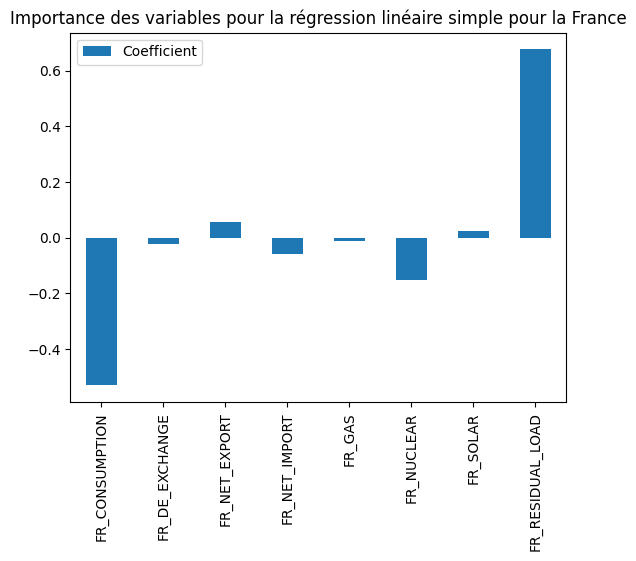

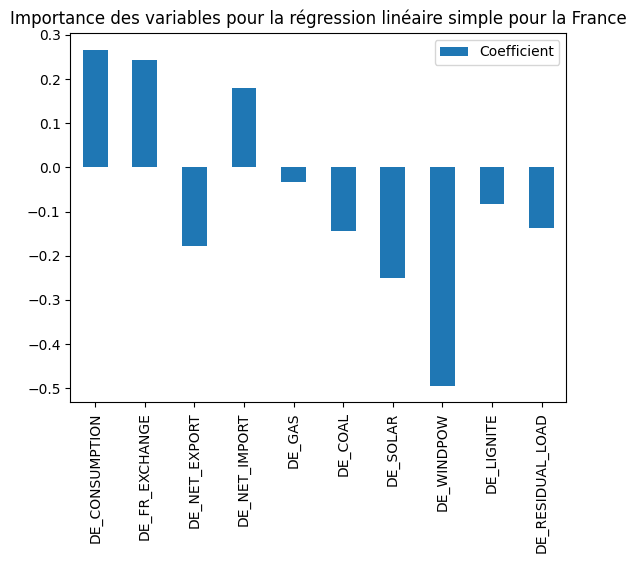

In [72]:
# ====================================================================================================
#
# SUPPRIMER ÇA SI LA RÉGRESSION LINÉAIRE SIMPLE N'EST PAS LE MEILLEUR MODÈLE !
#
# LE SUJET VEUT QU'ON NE CALCULE L'IMPORTANCE DES VARIABLES QUE POUR LE MEILLEUR MODÈLE.
#
# ====================================================================================================









# En supplément, on peut faire un diagramme qui affichera les coefficients et l'importance des variables pour le modèle de régression simple
matplotlib.rcParams.update(matplotlib.rcParamsDefault) # Réinitialisation des paramètres de mise en page de matplotlib.

# Pour la France
reg_lin_simple.fit(data_fr_train, target_fr_train)
coefficients_lin = pd.DataFrame(reg_lin_simple.coef_, index=data_fr_train.columns, columns=['Coefficient'])
coefficients_lin.plot(kind='bar')
plt.title('Importance des variables pour la régression linéaire simple pour la France')
plt.show()
plt.close()

# Pour l'Allemagne
reg_lin_simple.fit(data_de_train, target_de_train)
coefficients_lin = pd.DataFrame(reg_lin_simple.coef_, index=data_de_train.columns, columns=['Coefficient'])
coefficients_lin.plot(kind='bar')
plt.title('Importance des variables pour la régression linéaire simple pour la France')
plt.show()
plt.close()

# Régression linéaire RIDGE

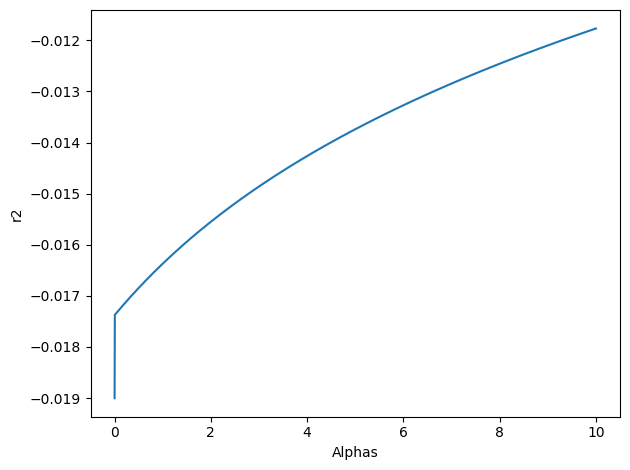

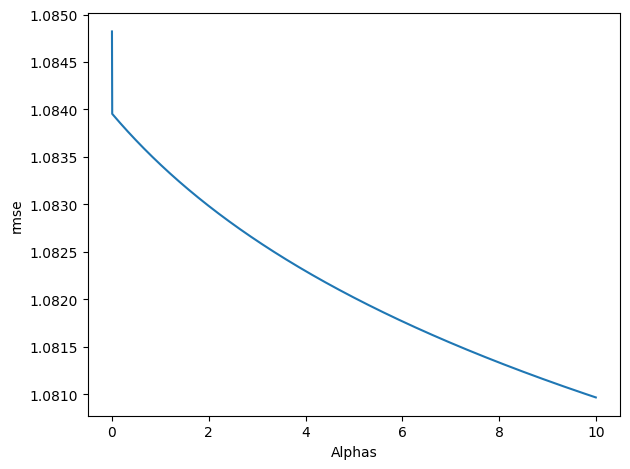

In [73]:
from sklearn.linear_model import Ridge

# On va chercher le meilleur coefficient alpha pour la régression Ridge.
# Nous allons en tester 200 valeurs différentes.
alphas = np.linspace(0, 10, 2000)
r2 = []
rmse = []
for alpha in alphas:
    ridge = Ridge(alpha)
    ridge.fit(data_fr_train, target_fr_train)
    prediction = ridge.predict(data_fr_test)
    r2.append(r2_score(target_fr_test, prediction))
    rmse.append(mean_squared_error(target_fr_test, prediction, squared=False))

ax = plt.gca()
ax.plot(alphas, r2)
plt.xlabel('Alphas')
plt.ylabel('r2')
plt.tight_layout()
plt.show()

ax = plt.gca()
ax.plot(alphas, rmse)
plt.xlabel('Alphas')
plt.ylabel('rmse')
plt.tight_layout()
plt.show()

# ridge = Ridge(10)
# ridge.fit(data_fr_train, target_fr_train)

# Pour afficher les coefficients pour la régression Ridge, nous avons besoin des coefficients de la régression linéaire simple. Donc il faut refit pour la France, puis pour l'Allemagne.
# reg_lin_simple.fit(data_fr_train, target_fr_train)
# r = np.abs(reg_lin_simple.coef_) / np.abs(ridge.coef_)
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# ax.plot(r)
# ax.set_title("Ratio des coefficients\npour une régression Ridge")
# plt.show()
#
# # normalisation
# print(np.linalg.norm(reg_lin_simple.coef_), np.linalg.norm(ridge.coef_))
# ridge = Ridge(0.1).fit(data_fr_train, target_fr_train)
#
# print(np.linalg.norm(reg_lin_simple.coef_), np.linalg.norm(ridge.coef_))
#
# r = np.abs(reg_lin_simple.coef_) / np.abs(ridge.coef_)
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# ax.plot(r)
# ax.set_title("Ratio des coefficients\npour une régression Ridge 0.1")
# plt.show()


# Régression linéaire Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(data_fr_train, target_fr_train)

print("Nombre de coefficients nulls :", sum(lasso.coef_ == 0))

On remarque que tous les coefficients sont nuls.
On va tester différentes valeurs de alpha :

In [ ]:
from sklearn.metrics import r2_score

res = []
for alpha in [0.00001, 0.0001, 0.005, 0.01, 0.015,
                 0.02, 0.025, 0.03, 0.04, 0.05, 0.06,
                 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4]:
    lasso = Lasso(alpha)
    lasso.fit(data_fr_train, target_fr_train)
    r2 = r2_score(target_fr_test, lasso.predict(data_fr_test))
    res.append({'alpha': alpha, 'r2': r2,
                'nbnull': sum(lasso.coef_ == 0)})

df = pd.DataFrame(res)
print(df)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(df['alpha'], df['r2'], label='r2')
ax[1].plot(df['alpha'], df['nbnull'], label="nbnull")
ax[1].plot(df['alpha'], lasso.coef_.shape[0] - df['nbnull'], label="nbvar")
ax[0].set_xscale('log'); ax[1].set_xscale('log')
ax[0].set_xlabel("alpha"); ax[1].set_xlabel("alpha")
ax[0].legend() ; ax[1].legend()
plt.show()

On remarque que la meilleure métrique de performance est pour alpha = 0.015.

# K-Nearest Neighbours (K-NN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(data_fr_train, target_fr_train)


# Arbre de décision pour la régression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(data_fr_train, target_fr_train)
